In [7]:

import control
import numpy as np 
import matplotlib.pyplot as plt


In [170]:
# definindo matrizes de Espaço de Estados para cada subtopologia

Ra = 1
Rb = 1
Rc = 1

La = 1e-3
Lb = 1e-3
Lc = 1e-3

Kwa = 1
Kwb = 1
Kwc = 1


A_ab= [-(Ra + Rb)/(La+Lb)]
A_ac= [-(Ra + Rc)/(La+Lc)]
A_bc= [-(Rb + Rc)/(Lb+Lc)]

B_ab = 1/(La+Lb)
B_ac = 1/(La+Lc)
B_bc = 1/(Lb+Lc)

C_ab = [1]
C_ac = [1]
C_bc = [1]

G_ab = [-(Kwa + Kwb)/(La+Lb)]
G_ac = [-(Kwa + Kwc)/(La+Lc)]
G_bc = [-(Kwb + Kwc)/(Lb+Lc)]

D_ab = [0, 0]
D_ac = [0, 0]
D_bc = [0, 0]

#unifica B e G numa matriz de entradas B_ext para ser compatível com biblioteca control
#Considerando o vetor u de entradas como [v(t)]
#                                        [w(t)]
B_ext_ab = np.hstack((B_ab, G_ab))
B_ext_ac = np.hstack((B_ac, G_ac))
B_ext_bc = np.hstack((B_bc, G_bc))

#Vamos simplificar e considerar w(t) uma constante, para manter um tempo de comutação constante

w = 2*np.pi #2pi radianos/seg

# Parâmetros de simulação
dt = 1e-3
t_total = 3
N = int(t_total / dt)

#condições iniciais
x0 = [0]


# Modelos
subtops = [
    control.ss(A_ab, B_ext_ab, C_ab, D_ab),
    control.ss(A_ac, B_ext_ac, C_ac, D_ac),
    control.ss(A_bc, B_ext_bc, C_ac, D_ac),
]

i_vec = np.zeros(N)
idx_vec = np.zeros(N)
t_vec = np.linspace(0, t_total, N)


print(len(t_vec))
print(t_vec)
print(len(i_vec))


3000
[0.00000000e+00 1.00033344e-03 2.00066689e-03 ... 2.99799933e+00
 2.99899967e+00 3.00000000e+00]
3000


0.16622183352326966
10.471975511965978
5.235987755982989
3.4906585039886586
2.6179938779914944
2.0943951023931953
1.7453292519943295
1.4959965017094252
1.3089969389957472
1.1635528346628865
1.0471975511965979
0.9519977738150889
0.8726646259971648
0.8055365778435366
0.7479982508547126
0.6981317007977318
0.6544984694978734
0.6159985595274103
0.581776417331443
0.551156605892946
0.5235987755982987
0.49866550056980835
0.47599888690754427
0.4553032831289554
0.4363323129985823
0.41887902047863895
0.40276828892176825
0.3878509448876286
0.3739991254273562
0.3611026038608956
0.34906585039886573
0.3378056616763217
0.32724923474893663
0.3173325912716961
0.30799927976370506
0.2991993003418849
0.29088820866572146
0.2830263651882695
0.27557830294647295
0.2685121926145121
0.2617993877991493
0.25541403687721886
0.24933275028490418
0.24353431423176686
0.2379994434537722
0.23271056693257727
0.22765164156447779
0.2228079896162974
0.21816615649929125
0.21371378595848942
0.20943951023931962
0.20533285317580

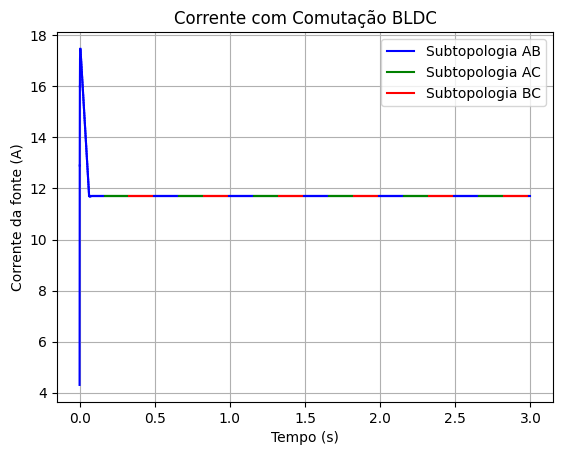

In [178]:
# Simulação
for i in range(N):
    t = t_vec[i]
    #define dinamica das entradas
    #degrau para V e rampa saturada para w
    if t < 1e-3:
        V = 0
        w = 0
    else:
        V = 36
        if(w < 2*np.pi):
            w = w + 0.1
            T = (2*np.pi/w)/6 #tempo que dura uma subtopologia
    print(T)

    u = [V, w]  # entrada: [V, omega]
    U_local = np.array([[V, V],
                        [w, w]])
    idx = int((t // T) % 3)  # subtopologia ativa
    idx_vec[i] = idx
    sys = subtops[idx]

    T_local = [0, dt]

    _, yout, xout = control.forced_response(sys, T_local, U_local, X0=x0, return_x = True)

    i_vec[i] = yout[0, 1]
    x0 = xout[:, -1]


# Plot com cores diferentes em cada subtopologia
colors = ['blue', 'green', 'red']
labels = ['Subtopologia AB', 'Subtopologia AC', 'Subtopologia BC']
already_plotted = [False, False, False]

for i in range(1, len(t_vec)):
    idx = int(idx_vec[i])  # subtopologia atual
    color = colors[idx]
    label = labels[idx] if not already_plotted[idx] else None

    plt.plot(t_vec[i-1:i+1], i_vec[i-1:i+1], color=color, label=label)
    already_plotted[idx] = True

plt.xlabel('Tempo (s)')
plt.ylabel('Corrente da fonte (A)')
plt.title('Corrente com Comutação BLDC')
plt.grid()
plt.legend(loc='upper right')
plt.show()

In [181]:
#Simulando correntes e tensões de fase

A_ab = [-(Ra+Rb)/(La+Lb), 0, (Ra+Rb)/(La+Lb)]
A_ac = [-(Ra+Rc)/(La+Lc), 0, (Ra+Rc)/(La+Lc)]
A_bc = [-(Rb+Rc)/(Lb+Lc), 0, (Rb+Rc)/(Lb+Lc)]


B_ab = [1/(La+Lb), 0, 0]
B_ac = [0, 1/(La+Lc), 0]
B_bc = [0, 0, 1/(Lb+Lc)]

C_ab = [[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]]

C_ac = [[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]]

C_bc = [[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]]

G_ab = [[-Kwa/(La+Lb)],
       [-Kwb/(La+Lb)],
       [0]]

G_ac = [[-Kwa/(La+Lc)],
       [0],
       [-Kwc/(La+Lc)]]
G_bc = [[0],
       [-Kwb/(Lb+Lc)],
       [-Kwc/(Lb+Lc)]]



D_ab = [[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]]

D_ac = [[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]]

D_bc = [[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]]

B_ext_ab = np.hstack((B_ab, G_ab))
# Modelos
subtops = [
    control.ss(A_ab, B_ext_ab, C_ab, D_ab),
    control.ss(A_ac, B_ext_ac, C_ac, D_ac),
    control.ss(A_bc, B_ext_bc, C_ac, D_ac),
]


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)